# **1. Dataset Fraud Detection**


Dataset yang saya gunakan pada eksperimen ini adalah Dataset Fraud Detection versi kompilasi, yaitu data transaksi perbankan yang telah disintesis agar menyerupai struktur dataset Credit Card Fraud Detection Kaggle, namun dengan ukuran yang lebih ringan (20.000 baris). Dataset ini dirancang untuk merepresentasikan pola-pola karakteristik transaksi normal dan transaksi fraud (penipuan), sehingga sangat relevan untuk pemodelan sistem klasifikasi berbasis machine learning.

Dataset tersusun atas 30 fitur numerik, terdiri dari V1-V28, Amount, serta variabel target Class. Fitur V1-V28 merupakan representasi komponen hasil transformasi PCA (Principal Component Analysis) yang umum digunakan untuk menjaga privasi pada sistem transaksi asli. Sementara itu, fitur Amount menggambarkan nominal transaksi yang dilakukan oleh pengguna.

Variabel target Class memiliki dua nilai:
*   0 -> transaksi normal
*   1 -> transaksi fraud

Sebagaimana pada kasus nyata, dataset ini memiliki rasio ketidakseimbangan (imbalanced) yang tinggi, di mana hanya sekitar 0,5% dari seluruh data merupakan transaksi fraud. Kondisi ini penting untuk diselesaikan dengan teknik seperti SMOTE, class weight, atau metode balancing lain pada tahap preprocessing.

Dataset ini dipilih karena:
*   Relevan untuk topik klasifikasi biner.
*   Struktur fiturnya sesuai untuk eksperimen MLOps.
*   Ukurannya cukup ringan sehingga efisien digunakan di Google Colab maupun dalam workflow CI/CD.

Dataset ini akan digunakan untuk proses EDA, preprocessing, pelatihan model, tracking eksperimen menggunakan MLflow, serta deployment dan monitoring model sesuai dengan standar submission Membangun Sistem Machine Learning.




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
# 2. Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8')
sns.set_palette("deep")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# 3. Memuat Dataset

file_path = "/content/fraud_detection_20k.csv"

df = pd.read_csv(file_path)

print("Ukuran dataset:", df.shape)
df.head()


Ukuran dataset: (20000, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.496714,0.348286,-0.471858,0.078838,0.664001,1.030595,-0.218650,-0.265537,1.432623,0.412781,...,3.035426,-1.249766,0.080632,0.412329,-0.335186,-1.063025,-0.781882,0.226756,12.257169,0
1,-0.138264,0.283324,1.012702,0.562897,-0.296116,-1.155355,0.382939,-0.857938,-0.950418,1.773199,...,-0.148098,1.761831,-2.263454,-0.082376,-0.038254,-0.820252,0.166851,-0.123666,81.008280,0
2,0.647689,-0.936520,-0.198187,0.341102,-0.066586,0.575437,0.735142,0.447372,1.539095,-1.523971,...,-1.731758,-0.300963,0.976212,0.472166,0.818734,0.683230,-0.142411,-0.240883,210.969267,0
3,1.523030,0.579584,0.090569,-1.277914,-0.175382,-0.619238,-1.183365,-1.014628,0.866289,-0.183776,...,0.515039,-0.905522,-0.717026,0.930568,-0.333139,0.417899,1.224504,0.277850,89.436853,0
4,-0.234153,-1.490083,0.717391,-0.186220,0.514054,-0.327403,0.100739,1.134335,-0.901823,-0.102585,...,-0.063741,0.340267,1.314964,1.139564,0.262483,0.422458,0.756447,-0.132856,1.183470,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# 4.1 Informasi Umum Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20000 non-null  float64
 1   V2      20000 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [6]:
# Statistik deskriptif
df.describe().T


,count,mean,std,min,25%,50%,75%,max
V1,20000.0,0.005699,1.002243,-3.922400,-0.666277,0.007701,0.681907,4.479084
V2,20000.0,-0.010017,0.997952,-4.465604,-0.698590,-0.007234,0.671609,3.727833
V3,20000.0,0.004139,1.005055,-4.295391,-0.669058,0.009204,0.688473,3.745379
V4,20000.0,0.005012,0.999770,-4.462969,-0.672235,0.009641,0.678452,3.760155
V5,20000.0,0.000001,0.999510,-3.705150,-0.664622,-0.005678,0.666828,3.829782
V6,20000.0,0.008113,1.000779,-3.782616,-0.665158,0.013890,0.676655,4.202026
V7,20000.0,-0.000084,1.000201,-3.999332,-0.675494,-0.008461,0.676022,3.707905
V8,20000.0,-0.000065,0.991631,-3.794637,-0.676926,-0.003286,0.673390,4.562115
V9,20000.0,0.004335,0.999329,-3.681040,-0.668611,0.002708,0.674580,3.626133
V10,20000.0,-0.007394,1.002752,-4.374043,-0.685542,-0.002280,0.673738,3.782188


In [7]:
# 4.2 Missing Values & Duplikasi

print("Jumlah missing values per kolom:")
print(df.isna().sum())

print("\nJumlah baris duplikat:", df.duplicated().sum())


Jumlah missing values per kolom:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Jumlah baris duplikat: 0


Jumlah tiap kelas:
Class
0    19884
1      116
Name: count, dtype: int64

Persentase tiap kelas (%):
Class
0    99.42
1     0.58
Name: proportion, dtype: float64


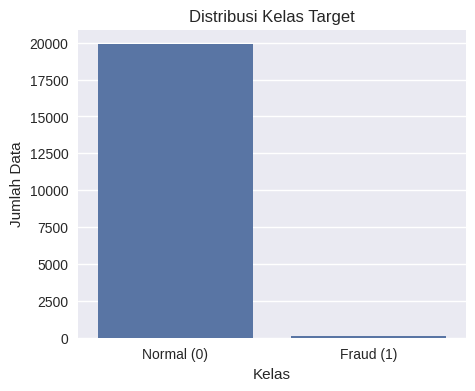

In [8]:
# 4.3 Distribusi Kelas Target

class_counts = df['Class'].value_counts()
class_ratio = df['Class'].value_counts(normalize=True) * 100

print("Jumlah tiap kelas:")
print(class_counts)

print("\nPersentase tiap kelas (%):")
print(class_ratio)

# Visualisasi distribusi kelas
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'])
plt.title('Distribusi Kelas Target')
plt.ylabel('Jumlah Data')
plt.xlabel('Kelas')
plt.show()


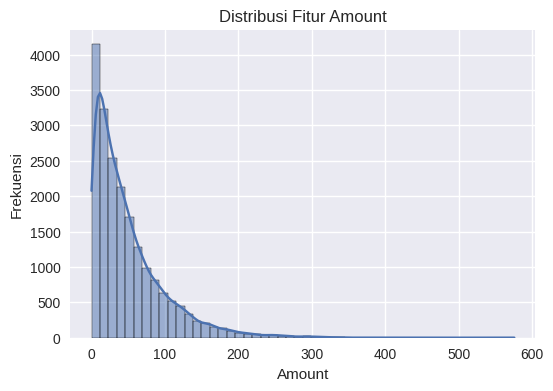

In [9]:
# 4.4 Distribusi Fitur Amount

plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribusi Fitur Amount')
plt.xlabel('Amount')
plt.ylabel('Frekuensi')
plt.show()


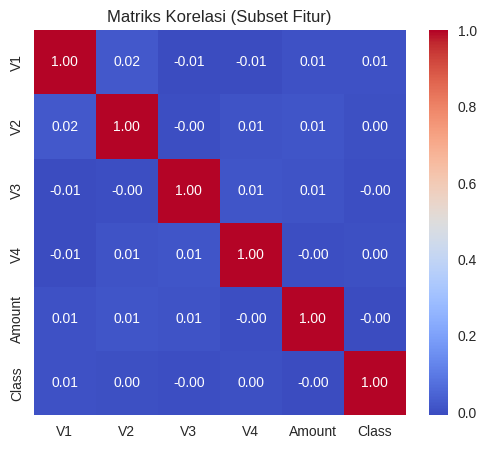

In [10]:
# 4.5 Korelasi Beberapa Fitur

# mngmbil subset kecil fitur untuk contoh korelasi
sample_cols = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
corr_sample = df[sample_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_sample, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriks Korelasi (Subset Fitur)')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
# 5.1 Menghapus Duplikat

initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

print("Ukuran awal :", initial_shape)
print("Ukuran akhir:", final_shape)
print("Jumlah baris yang dihapus (duplikat):", initial_shape[0] - final_shape[0])


Ukuran awal : (20000, 30)
Ukuran akhir: (20000, 30)
Jumlah baris yang dihapus (duplikat): 0


In [12]:
# 5.2 Memisahkan Fitur dan Target

X = df.drop('Class', axis=1)
y = df['Class']

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (20000, 29)
Shape y: (20000,)


In [13]:
# 5.3 Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True) * 100)


Ukuran X_train: (16000, 29)
Ukuran X_test : (4000, 29)
Ukuran y_train: (16000,)
Ukuran y_test : (4000,)

Distribusi kelas di y_train:
Class
0    99.41875
1     0.58125
Name: proportion, dtype: float64

Distribusi kelas di y_test:
Class
0    99.425
1     0.575
Name: proportion, dtype: float64


In [14]:
# 5.4 Scaling Fitur Numerik

num_cols = X_train.columns  # semua kolom fitur

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled  = scaler.transform(X_test[num_cols])

# mngubh kembali ke DataFrame agar kolomnya jelas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=num_cols, index=X_test.index)

X_train_scaled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6299,-0.590158,-0.375325,0.737722,0.448958,0.156577,-0.874347,-0.471978,-0.840977,0.458625,-0.684885,...,0.374799,0.216824,-1.877117,0.461626,-0.021737,-1.141894,1.695648,-0.489784,-0.802581,0.350038
3559,-1.303812,-0.379937,0.119903,1.297478,0.641639,-1.514958,0.514782,-0.693136,0.914828,-0.441740,...,0.579137,0.322089,-0.722557,0.253049,0.112132,-1.271067,0.272141,-0.426399,-0.520290,0.685857
7903,-1.178429,-1.000971,1.405269,0.509568,0.481421,1.331565,0.337033,1.114416,-0.236779,-0.329100,...,-0.287729,-0.151432,1.327298,0.316912,1.415059,0.470525,0.073040,-0.442789,0.801742,1.726098
7569,-0.588087,-0.035942,0.426927,0.053800,0.575877,-0.324444,-0.778233,0.631941,0.628742,-1.359378,...,0.976120,-1.664468,1.336374,-0.008876,-0.605396,1.248850,0.023239,0.309484,-1.893344,-0.927206
17119,0.547400,-0.148556,1.082792,1.293256,0.835927,1.219306,0.209613,1.373177,-0.059643,-0.034268,...,-0.154146,3.075626,0.465574,-1.172707,-0.152514,-1.074415,1.731927,-0.111346,2.024942,-0.212870


# **6. Menyimpan Dataset Hasil Prepprocessing**

In [15]:
# 6. Menyimpan Dataset Preprocessing

import os

output_dir = "namadataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)

# mnggabungkan kembali fitur dan target
train_preprocessed = pd.concat([X_train_scaled, y_train], axis=1)
test_preprocessed  = pd.concat([X_test_scaled, y_test], axis=1)

train_path = os.path.join(output_dir, "fraud_train_preprocessed.csv")
test_path  = os.path.join(output_dir, "fraud_test_preprocessed.csv")

train_preprocessed.to_csv(train_path, index=False)
test_preprocessed.to_csv(test_path, index=False)

print("Train preprocessed disimpan di:", train_path)
print("Test preprocessed  disimpan di:", test_path)


Train preprocessed disimpan di: namadataset_preprocessing/fraud_train_preprocessed.csv
Test preprocessed  disimpan di: namadataset_preprocessing/fraud_test_preprocessed.csv
